In [3]:
from pandas import read_csv, DataFrame
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data1 = read_csv('C:/Users/ASUS-R/_pY/R11_PDUA_Curent_L1.csv',',',parse_dates=['date'], dayfirst=True, index_col='date')
#print(data1.head())
pd.DataFrame(data1)


,R11_PDUA_Curent_L1
date,
2020-04-30 07:24:00,4.700000
2020-04-30 07:26:00,4.685714
2020-04-30 07:28:00,4.671429
2020-04-30 07:30:00,4.700000
2020-04-30 07:32:00,4.714286
...,...
2020-10-09 09:38:00,4.700000
2020-10-09 09:40:00,4.700000
2020-10-09 09:42:00,4.657143


In [10]:
#data = read_csv('C:/Users/ASUS-R/_pY/output_fourth.csv',',', usecols = ['date', 'R11_PDUA_Curent_L1'])
#data=data1.drop(data1.columns[[0]], axis='columns')
#print(data.head())

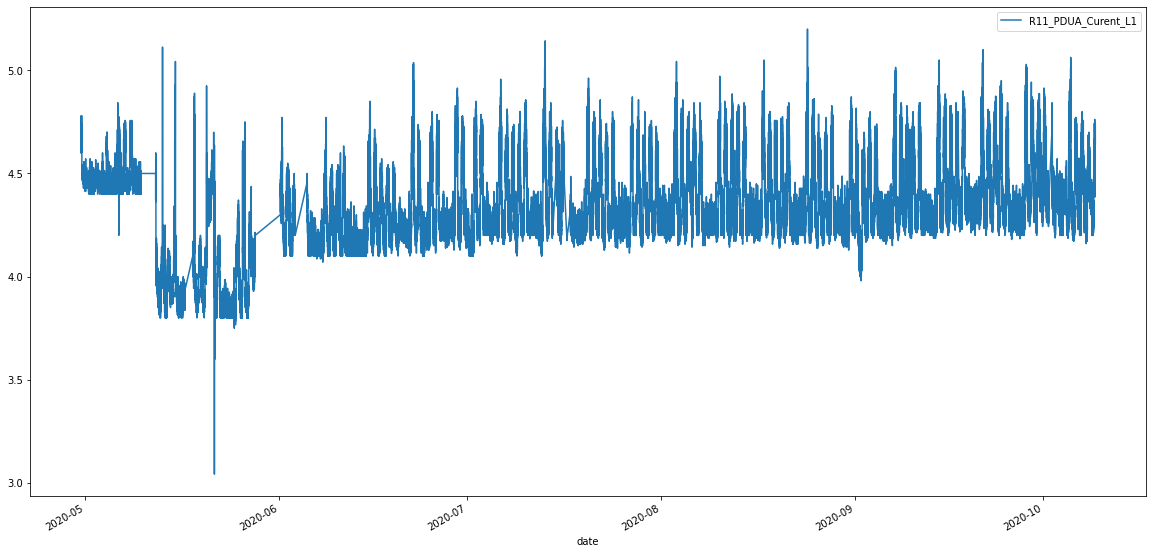

In [4]:
data1.plot(figsize=(20,10))
plt.show() #вывод 

In [30]:
#data2=data.dropna()
#data2.plot(figsize=(20,10))
##pd.DataFrame(data2)

In [97]:
# есть смысл перейти к почасовому интервалу и среднему значению температуры и рассматривать ряд в промежутке от 06.2020 
# - это избавит от выбросов и уменьшит колебания ряда. 

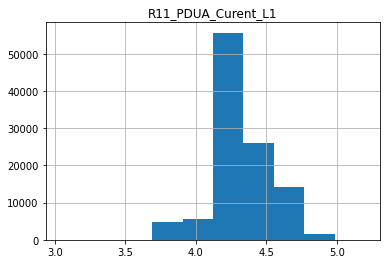

       R11_PDUA_Curent_L1
count       107966.000000
mean             4.322796
std              0.200604
min              3.042857
25%              4.214286
50%              4.287500
75%              4.457143
max              5.200000


In [28]:
data1.hist() #расчёт гистограммы
plt.show() #вывод гистограммы
print(data1.describe())

<AxesSubplot:xlabel='date'>

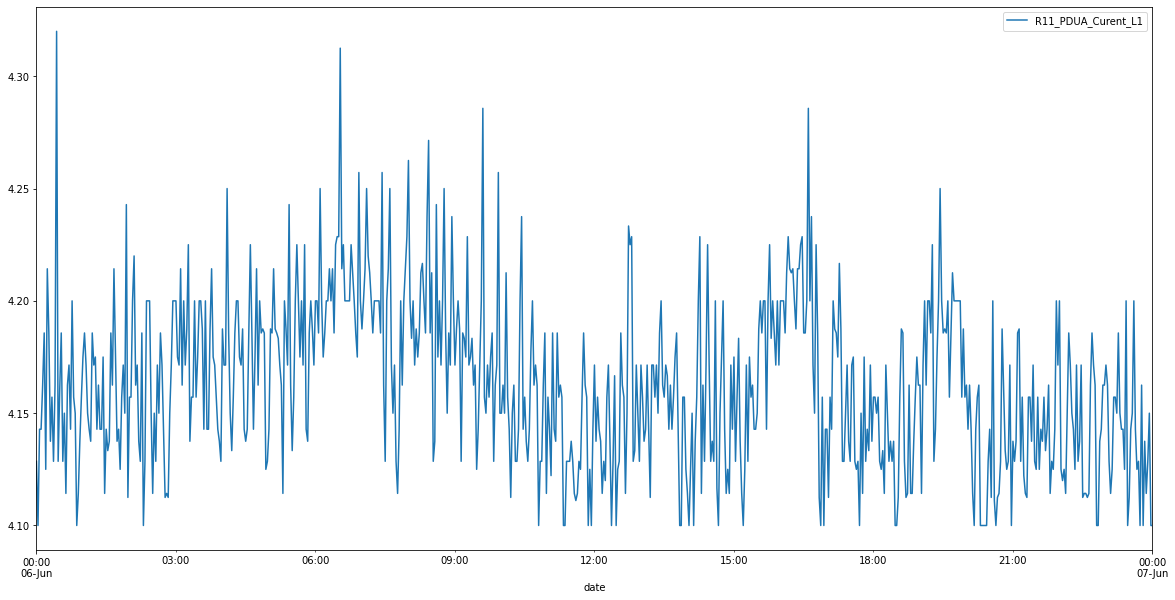

In [15]:
data_07 = data1.query("date >= '2020-06-06'& date <= '2020-06-07'") #просмотр значений ряда в небольшом промежутке
data_07.plot(figsize=(20,10))

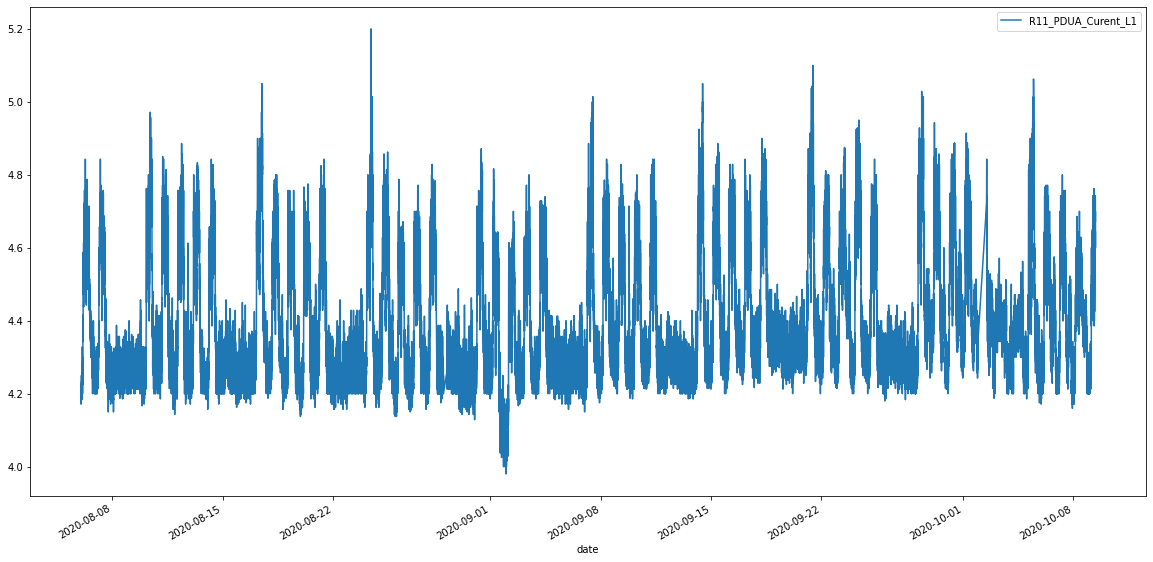

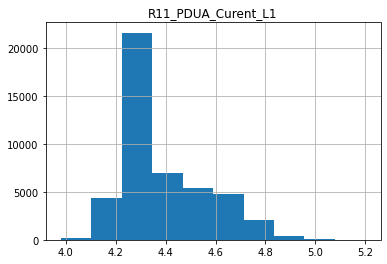

       R11_PDUA_Curent_L1
count        45743.000000
mean             4.384340
std              0.167743
min              3.980000
25%              4.257143
50%              4.325000
75%              4.500000
max              5.200000


In [5]:
data_08 = data1.query("date >= '2020-08-06' ")

data_08.plot(figsize=(20,10))
data_08.hist() #расчёт гистограммы
plt.show() #вывод гистограммы
print(data_08.describe())

In [104]:
pd.DataFrame(data_08)

,R11_PDUA_Curent_L1
date,
2020-09-03 00:00:00,4.262500
2020-09-03 00:02:00,4.214286
2020-09-03 00:04:00,4.187500
2020-09-03 00:06:00,4.214286
2020-09-03 00:08:00,4.200000
...,...
2020-10-01 22:34:00,4.357143
2020-10-01 22:36:00,4.350000
2020-10-01 22:38:00,4.400000


In [32]:
#pd.to_datetime(data_08['date'])

In [14]:
#data_09=pd.notnull(data_08['R11_PDUA_Curent_L1'])
#print(data_09)

In [15]:
#np.isfinite(data_08['R11_PDUA_Curent_L1'])

In [16]:
#как можно заметить из характеристик и гистограммы, ряд более менее однородный и имеет относительно небольшой разброс.
#значение среднего "mean" в резуьтате перехода в промежуток от 06.2020 изменилось незначительно.

In [21]:
#data_08.reset_index()

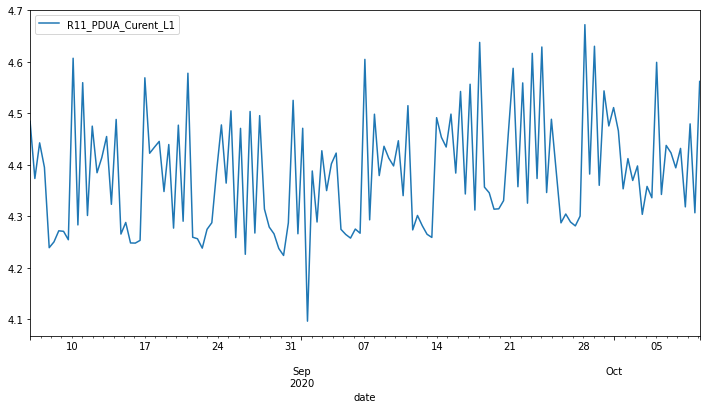

In [7]:
sample_data_08=data_08.resample('11H').mean() #задан период округления (H) и агрегатная функция1
sample_data_08.plot(figsize=(12,6))
plt.show() #вывод 

In [8]:
pd.DataFrame(sample_data_08)

,R11_PDUA_Curent_L1
date,
2020-09-06 00:00:00,4.247321
2020-09-06 01:00:00,4.266369
2020-09-06 02:00:00,4.256746
2020-09-06 03:00:00,4.286462
2020-09-06 04:00:00,4.271714
...,...
2020-10-01 18:00:00,4.397159
2020-10-01 19:00:00,4.451302
2020-10-01 20:00:00,4.405060


In [47]:
#pd.notnull(sample_data_08['R11_PDUA_Curent_L1'])

In [9]:
row =  [u'JB', u'p-value', 'skew', 'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(sample_data_08) 
a = np.vstack([jb_test])
SimpleTable(a, row)

# планировал провести тест Харки — Бера для определения нормальности распределения - полагаю будет излишне

JB
100.70011562404792
1.3590884719804052e-22
0.9753498744187986
2.7278443752744277


In [9]:
#обобщенный тест Дикки-Фуллера на наличие единичных корней
#для проверки стационарности

test = sm.tsa.adfuller(sample_data_08)   
print ('adf: ', test[0] )       
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -0.8462107101699353
p-value:  0.805169888966492
Critical values:  {'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813}
есть единичные корни, ряд не стационарен


In [ ]:
#Если ряд не стационарный, то определяется порядок интегрированного ряда:

In [11]:
data_09 = sample_data_08.diff(periods=1).dropna()

# функция diff() вычисляет разность исходного ряда с рядом с заданным смещением периода. 
# период смещения передается как параметр period. 
# Т.к. в разности первое значение получиться неопределенным, то нам надо избавиться от него для этого и используется метод dropna().

In [12]:
# снова необходимо проверить рад на стационарность:
test = sm.tsa.adfuller(data_09)   
print ('adf: ', test[0] )       
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -9.46903236411597
p-value:  4.1541898418946765e-16
Critical values:  {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976}
единичных корней нет, ряд стационарен


In [ ]:
# Как видно из вывода выше - получившийся ряд первых разностей приблизился к стационарному.

<AxesSubplot:xlabel='date'>

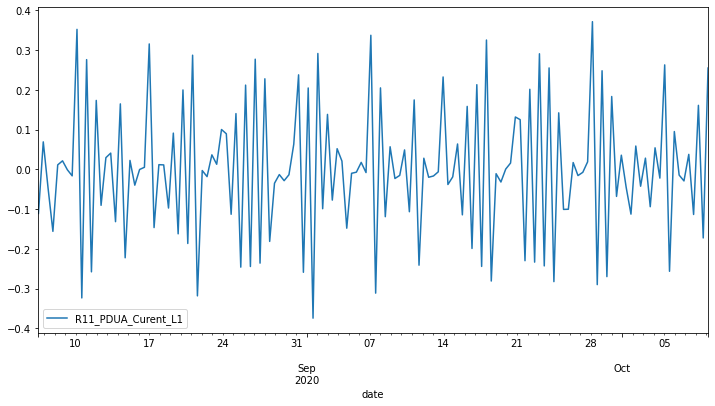

In [15]:
data_09.plot(figsize=(12,6))

In [ ]:
#Для моделирования будем использовать модель ARIMA, построенную для ряда первых разностей.
#Чтобы построить модель необходимо знать параметры:
#p — порядок компоненты AR
#d — порядок интегрированного ряда
#q — порядок компонетны MA



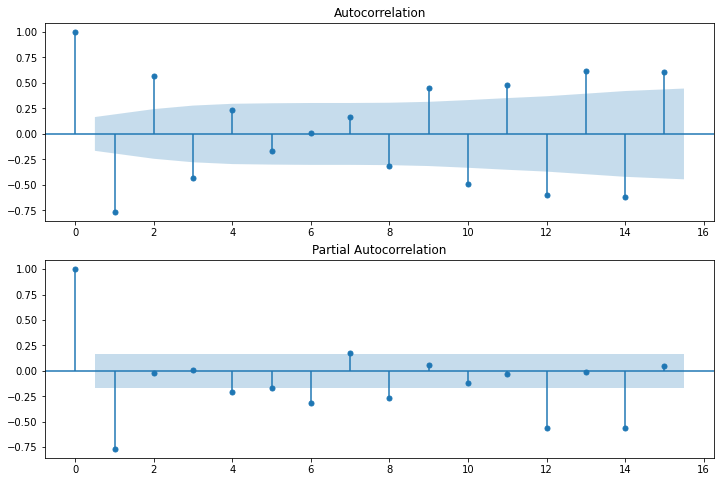

In [55]:
#вывод ACF и PACF, у которых по оси X откладываются номера лагов, а по оси Y значения соответствующих функций
#ACF поможет нам определить q, т. к. по ее коррелограмме можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_09.values.squeeze(), lags=15, ax=ax1)

#PACF поможет определить p, т. к. по ее коррелограмме можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_09, lags=15, ax=ax2)
plt.show() #вывод 

In [44]:
#Из этого графика определяем  𝑞  (для MA) - третий параметр в ARIMA(p,d,q). 
#Величина  𝑞  равна последнему, отличному от нуля элементу на графике.

# Из 2-го графика определяем  𝑝  (для AR) - первый параметр в ARIMA(p,d,q). 
# Величина  𝑝  равна последнему (подряд с начала) не равному нулю элементу.

In [64]:
#Обучающая выборка для модели: 08-06-2020 по 09-25-2020
src_data_model = sample_data_08[:'2020-09-25']
mod = ARIMA(src_data_model, order=(14,1,5), freq='11H')
res = mod.fit()
print (res.summary())

c:\users\asus-r\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\asus-r\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     R11_PDUA_Curent_L1   No. Observations:                  112
Model:                ARIMA(14, 1, 5)   Log Likelihood                 166.171
Date:                Sat, 07 Nov 2020   AIC                           -292.343
Time:                        23:10:08   BIC                           -238.152
Sample:                    08-06-2020   HQIC                          -270.359
                         - 09-25-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6673      0.134     -4.991      0.000      -0.929      -0.405
ar.L2         -0.6238      0.136     -4.603      0.000      -0.889      -0.358
ar.L3         -0.6028      0.121     -4.966      0.0

c:\users\asus-r\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
# оценка модели




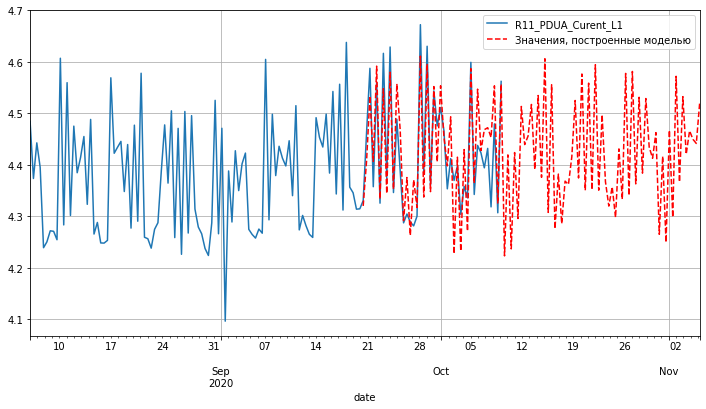

In [65]:
#Прогнозирование модели ARIMA по выборке и вне выборки
pred = res.predict(start='2020-09-20', end='2020-11-05', typ='levels')
#Вывод
sample_data_08.plot(figsize=(12,6))
pred.plot(style='r--', c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
На грифике красным цветом выделены значения полученные с помощью моделирования ARIMA.